# TD3 - Modes de vibrations et oscillation libre d'un véhicule

In [12]:
%matplotlib inline

import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 12,
})

## Description du problème

On se propose d'étudier le comportement vibratoire d'une voiture : il s'agit d'obtenir les **modes de vibrations** ainsi que d'étudier la **réponse en oscillation libre** du véhicule.

![Schéma d'un véhicule](pictures/Voiture2DDL.png)

Le véhicule de masse $m = 1200\,kg$ et de moment d'inertie $J = 1000\, kg\,m^2$ a pour centre de masse $C$. 

**Rappels :**

* L'ensemble principal du véhicule (châssis, bloc moteur, etc.) est considéré comme un seul solide indéformable,
* Les déplacements et les rotations sont supposés petits,
* Les pneumatiques et les systèmes de suspension du véhicule sont modélisés à l'aide de deux ressorts.

### Données du problème

Considérons les données quantitatives suivantes :

| $m$        | $J$             | $l_1$    | $l_2$    | $k_1$               | $k_2$                |
|:----------:|:---------------:|:--------:|:--------:|:-------------------:|:-------------------:|
| $1200\,\mathrm{kg}$ | $1000\,\mathrm{kg\,m}^2$ | $1.5\,\mathrm{m}$ | $1.2\,\mathrm{m}$ | $100\,\mathrm{kN\,m}^{-1}$  | $150\,\mathrm{kN\,m}^{-1}$  |

In [13]:
m = 1200 # mass in [kg]
J = 1000 # rotational interia in [kg.m2]
l1 = 1.5 # front length [m]
l2 = 1.2 # rear length [m]
l = l1+l2
k1 = 100000 # front stiffness [N.m-1]
k2 = 150000 # rear stiffness [N.m-1]

## Equations du mouvement

Le paramétrage du véhicule est plus moins déjà mis en place dans l'énoncé du problème :

![Paramétrage du mouvement](pictures/TD3-parametrage.png)

Le mouvement du véhicule est une combinaison d'une translation verticale et d'une rotation autour du centre de masse $C$.

### Actions mécaniques

Les équations décrivant le mouvement du véhicule peuvent être obtenues en écrivant l'équilibre dynamique de celui-ci. Commençons par faire un bilan des actions mécaniques :

* Action du ressort 1 sur le véhicule,
* Action du ressort 2 sur le véhicule.

Ces actions mécaniques peuvent être exprimées à l'aide de torseurs d'action mécanique faisant apparaître les résultantes et les moments mécaniques. Par exemple :
$$
    \mathcal{F}(\mathrm{ressort}~1 \to\mathrm{véhicule})
    =
    \begin{array}{r}%
    \vphantom{\vec{F}}%
    \cr%
    \vphantom{\vec{F}}%M_1%
    \end{array}%
    \!\!\!%
    \left\lbrace%
    \!\!%
    \begin{array}{l}%
    \vec{F}(\mathrm{ressort}~1 \to\mathrm{véhicule})%
    \cr%
    \vec{M}(M_1, \mathrm{ressort}~1 \to\mathrm{véhicule})\\%
    \end{array}%
    \right.%
$$
où $\vec{F}(\mathrm{ressort}~1 \to\mathrm{véhicule})$ et $\vec{M}(M_1, \mathrm{ressort}~1 \to\mathrm{véhicule})$  sont respectivement la résultante et le moment, exprimé ici au point $M_1$, de l'action mécanique du ressort $1$ sur le véhicule. Leur expression :
$$
\begin{split}
    \vec{F}(\mathrm{ressort}~1 \to\mathrm{véhicule})
    &=
    -k_1 u_1(t) \vec{e}_ {y}
    \\
    \vec{M}(M_1, \mathrm{ressort}~1 \to\mathrm{véhicule})
    &=
    \vec{0}.
\end{split}
$$
Si l'on exprime le moment au point $M_1$, le moment est nul car c'est un effort ponctuel avec $M_1$ comme point d'application. Finalement, on peut réécrire cette action mécanique sous forme d'un torseur d'action mécanique :
$$
    \mathcal{F}(\mathrm{ressort}~1 \to\mathrm{véhicule})
    =
    \begin{array}{r}%
    \vphantom{\vec{F}}%
    \cr%
    \vphantom{\vec{F}}M_1%
    \end{array}%
    \!\!\!%
    \left\lbrace%
    \!\!%
    \begin{array}{l}%
    -k_1 u_1(t) \vec{e}_ {y}%
    \cr%
    \vec{0}\\%
    \end{array}%
    \right.%
$$
En utilisant la formule de transport des moments (moyen mnémotechnique : BABAR --> Moment en B = Moment en A + produit vectoriel entre le vecteur BA et la Résultante), il est possible d'exprimer cette même action mécanique au point C :
$$
\begin{split}
    \vec{M}(C, \mathrm{ressort}~1 \to\mathrm{véhicule})
    &=
    \vec{M}(M_1, \mathrm{ressort}~1 \to\mathrm{véhicule})\\
    &+
    \vec{CM_1}\wedge{}\vec{F}(\mathrm{ressort}~1 \to\mathrm{véhicule})
\end{split}
$$
Sachant que :
$$
\begin{split}
    &\vec{M}(M_1, \mathrm{ressort}~1 \to\mathrm{véhicule}) = \vec{0},\\
    &\vec{CM_1} = l_1 \vec{e}_{x},\\
    &\vec{F}(\mathrm{ressort}~1 \to\mathrm{véhicule}) =  -k_1 u_1(t) \vec{e}_ {y}
\end{split}
$$,
on en déduit :
$$
\begin{split}
    \vec{M}(C, \mathrm{ressort}~1 \to\mathrm{véhicule}) 
    &= 
    l_1 \vec{e}_{x} 
    \wedge{}
    (-k_1 u_1(t) \vec{e}_ {y}) \\
    &=
    -k_1 l_1 u_1(t) 
    \vec{e}_{x} \wedge{}\vec{e}_ {y} \\
    &=
    -k_1 l_1 u_1(t)
    \vec{e}_{z}.
\end{split}
$$
Récapitulons cela proprement sous forme d'un torseur d'action mécanique :
$$
\boxed{
    \mathcal{F}(\mathrm{ressort}~1 \to\mathrm{véhicule})
    =
    \begin{array}{r}%
    \vphantom{\vec{F}}%
    \cr%
    \vphantom{\vec{F}}C%
    \end{array}%
    \!\!\!%
    \left\lbrace%
    \!\!%
    \begin{array}{l}%
    -k_1 u_1(t)\vec{e}_ {y}%
    \cr%
    -k_1 l_1 u_1(t) 
    \vec{e}_{z}\\%
    \end{array}%
    \right.%
.}
$$

L'action mécanique du ressort 2 sur le véhicule est quasiment identique, à une différence de signe près pour le moment en $C$ venant de $\vec{CM_2} = - l_2 \vec{e}_{x}$. Nous obtenons :
$$
\boxed{
    \mathcal{F}(\mathrm{ressort}~2 \to\mathrm{véhicule})
    =
    \begin{array}{r}%
    \vphantom{\vec{F}}%
    \cr%
    \vphantom{\vec{F}}C%
    \end{array}%
    \!\!\!%
    \left\lbrace%
    \!\!%
    \begin{array}{l}%
    -k_2 u_2(t) \vec{e}_ {y}%
    \cr%
    k_2 l_2 u_2(t)
    \vec{e}_{z}\\%
    \end{array}%
    \right.%
.}
$$

### Principe fondamental de la dynamique

Le principe fondamental de la dynamique appliqué à un solide indéformable fait intervenir trois équations pour un problème 2D plan : deux équations pour les résultantes et une équation pour les moments.

Une façon "élégante" d'écrire le PFD pour un solide indéformable (et non une masse ponctuelle) est de l'écrire comme une égalité entre le torseur dynamique et la somme des torseurs d'action mécanique :
$$
    \mathcal{D}(\mathrm{véhicule}/\mathcal{R})
    =
    \mathcal{F}(\mathrm{ressort}~1 \to\mathrm{véhicule})
    +
    \mathcal{F}(\mathrm{ressort}~2 \to\mathrm{véhicule}).
$$
L'expression générale du torseur dynamique à un point quelconque $M$ est :
$$
    \mathcal{D}(\mathrm{véhicule}/\mathcal{R})
    =
    \begin{array}{r}%
    \vphantom{\vec{F}}%
    \cr%
    \vphantom{\vec{F}}%M_1%
    \end{array}%
    \!\!\!%
    \left\lbrace%
    \!\!%
    \begin{array}{l}%
    m \vec{A}(C, \mathrm{véhicule}/\mathcal{R})%
    \cr%
    \vec{\delta}(M, \mathrm{véhicule}/\mathcal{R})\\%
    \end{array}%
    \right.%
    .
$$
Nous retrouvons le terme usuel en mécanique du point, "masse fois accélération", qui est la résultante dynamique. A cela se rajoute un moment dynamique, traduisant qu'un solide présente une inertie de rotation. 

L'expression de l'accélération du centre de masse est simplement :
$$
    \vec{A}(C, \mathrm{véhicule}/\mathcal{R}) 
    =
    \ddot{u}_C(t) \vec{e}_{y}.
$$

Le moment dynamique peut être obtenu par dérivation du moment cinétique, dont l'expression au point $C$ est dans notre cas :
$$
    \vec{\sigma}(C, \mathrm{véhicule}/\mathcal{R}) = J \dot{\theta}_C(t) \vec{e}_z.
$$
On en déduit, par dérivation, que :
$$
    \vec{\delta}(C, \mathrm{véhicule}/\mathcal{R}) = J \ddot{\theta}_C(t) \vec{e}_z.
$$
En résumé, l'expression du torseur dynamique du véhicule exprimé en $C$ est donnée par :
$$
    \boxed{
        \mathcal{D}(\mathrm{véhicule}/\mathcal{R})
        =
        \begin{array}{r}%
        \vphantom{\vec{F}}%
        \cr%
        \vphantom{\vec{F}}C%
        \end{array}%
        \!\!\!%
        \left\lbrace%
        \!\!%
        \begin{array}{l}%
        m \ddot{u}_C(t) \vec{e}_{y}%
        \cr%
        J \ddot{\theta}_C(t) \vec{e}_z\\%
        \end{array}%
        \right.%
    }
$$

Les équations provenant du PFD appliqué à $\{ \mathrm{véhicule} \}$ en $C$ sont :
$$
\begin{split}
    \mathrm{résultante}~\%~\vec{e}_{y} :\quad
    & m \ddot{u}_C(t) = -k_1 u_1(t) - k_2 u_2(t),
    \\
    \mathrm{moment~en}~C~\%~\vec{e}_{z} :\quad
    & J \ddot{\theta}_C(t) = -k_1 l_1 u_1(t) + k_2 l_2 u_2(t).
\end{split}
$$
Il ne se passe rien suivant $\vec{e}_{x}$, l'équation qui en découle ne nous intéresse pas ici.

Les deux équations du mouvement ne sont à elles seules peu utiles : nous avons deux équations pour quatres inconnues $u_C(t), \theta_C(t), u_1(t), u_2(t)$.

### Relations cinématiques

Les quatres quantités $u_C(t), \theta_C(t), u_1(t), u_2(t)$ ne sont pas indépendantes. En se reportant au schéma précédent présentant une configuration déformée à l'instant $t$, nous pouvons identifier les relations géométriques suivantes :
$$
\begin{split}
    u_1(t) &= u_C(t) + l_1 \tan\theta_C(t), \\
    u_2(t) &= u_C(t) - l_2 \tan\theta_C(t).
\end{split}
$$
En supposant les déplacements et rotations petits, nous pouvons faire l'approximation $\tan\theta_C(t) \approx \theta_C(t)$. Ainsi :
$$
\begin{split}
    u_1(t) &= u_C(t) + l_1\theta_C(t),\\
    u_2(t) &= u_C(t) - l_2\theta_C(t).
\end{split}
$$
Cette relation peut s'écrire sous forme matricielle :
$$
\boxed{
\begin{pmatrix}
    u_1(t) \\ u_2(t)
\end{pmatrix}
=
\begin{bmatrix}
    1 & l_1 \\
    1 & -l_2
\end{bmatrix}
\begin{pmatrix}
 u_C(t) \\ \theta_C(t)
\end{pmatrix}.
}
$$

Cette matrice peut être inversée pour avoir la relation dans l'autre sens :
$$
\boxed{
    \begin{pmatrix}
    u_C(t) \\ \theta_C(t)
    \end{pmatrix}
    =
    \begin{bmatrix}
        l_2/l & l_1/l \\
        1/l & -1/l
    \end{bmatrix}
    \begin{pmatrix}
        u_1(t) \\ u_2(t)
    \end{pmatrix},
}
$$
où $l = l_1+l_2$.

Ainsi, si $u_1(t)$ et $u_2(t)$ sont connus, il est possible d'avoir $u_C(t)$ et $\theta_C(t)$, et inversement.

### Equations finales

Les relations cinématiques associées aux deux équations obtenues par l'application du principe fondamental de la dynamique permettent d'obtenir les équations décrivant le mouvement du véhicule :
$$
\begin{split}
 & m \ddot{u}_C(t) = -k_1 \big(u_C(t) + l_1\theta_C(t)\big) - k_2 \big(u_C(t) - l_2\theta_C(t)\big) \\
 \Rightarrow\quad&
 \boxed{
     m \ddot{u}_C(t) + (k_1+k_2)u_C(t) + (k_1 l_1 - k_2 l_2) \theta_C(t) = 0, \forall{}t,
 }
\end{split}
$$
et :
$$
\begin{split}
 & J \ddot{\theta}_C(t) = -k_1 l_1 \big(u_C(t) + l_1\theta_C(t)\big) + k_2 l_2 \big(u_C(t) - l_2\theta_C(t)\big) \\
 \Rightarrow\quad&
 \boxed{
    J \ddot{\theta}_C(t) + (k_1 l_1 - k_2 l_2) u_C(t) + (k_1 l_1^2 + k_2 l_2^2) \theta_C(t) = 0, \forall{}t.
 }
\end{split}
$$

Finalement, ce système à deux équations peut s'écrire sous forme matricielle comme :
$$
\boxed{
\begin{bmatrix}
    m & \\
    & J 
\end{bmatrix}
\begin{pmatrix}
    \ddot{u}_C(t) \\ \ddot{\theta}_C(t)
\end{pmatrix}
+
\begin{bmatrix}
    k_1+k_2 & k_1 l_1 - k_2 l_2\\
    k_1 l_1 - k_2 l_2 & k_1 l_1^2 + k_2 l_2^2
\end{bmatrix}
\begin{pmatrix}
    {u}_C(t) \\ {\theta}_C(t)
\end{pmatrix}
=
\begin{pmatrix}
    0 \\ 0
\end{pmatrix},
\forall{t}.
}
$$
Nous pouvons identifier deux matrices, la matrice de masse et la matrice de rigidité de notre problème :
$$
\mathbf{M}
=
\begin{bmatrix}
    m & \\
    & J 
\end{bmatrix},
\quad\mathrm{et}\quad
\mathbf{K}
=
\begin{bmatrix}
    k_1+k_2 & k_1 l_1 - k_2 l_2\\
    k_1 l_1 - k_2 l_2 & k_1 l_1^2 + k_2 l_2^2
\end{bmatrix}.
$$

In [14]:
Mc = np.array(
    [[m, 0.0],
     [0.0, J]])
Kc = np.array(
    [[k1 + k2      ,  k1*l1 - k2*l2     ],
     [k1*l1 - k2*l2, k2*l2**2 + k1*l1**2]])

Pu2c = np.array(
    [[l2/l, l1/l],
     [ 1/l,-1/l]])
Pc2u = np.array(
    [[1,  l1],
     [1, -l2]])

## Modes de vibrations

### Rappel de cours

Pour ce problème à deux DDL, nous avons deux modes de vibrations définis par les doublets $(\omega_a, \mathbf{v}_a)$ et $(\omega_b, \mathbf{v}_b)$. Ces modes de vibrations sont des solutions bien particulières de l'équation de mouvement. Ce sont des cas où le mouvement du système est harmonique, c'est-à-dire de la forme :
$$
\begin{pmatrix}
    {u}_C(t) \\ {\theta}_C(t)
\end{pmatrix}
=
\begin{pmatrix}
    {u}_a \cos(\omega_a t) \\ 
    {\theta}_a\cos(\omega_a t)
\end{pmatrix}
=
\mathbf{v}_a \cos(\omega_a t)
\quad\mathrm{et}\quad
\begin{pmatrix}
    {u}_C(t) \\ {\theta}_C(t)
\end{pmatrix}
=
\begin{pmatrix}
    {u}_b \cos(\omega_b t) \\ 
    {\theta}_b\cos(\omega_b t)
\end{pmatrix}
=
\mathbf{v}_b \cos(\omega_b t).
$$
Pour chaque mode, les deux DDL sont harmoniques et de même pulsation.

Les modes de vibrations sont obtenus par la résolution d'un problème aux valeurs propres généralisées, de la forme :
$$
    \mathbf{K}\mathbf{v} = \omega^2\mathbf{M}\mathbf{v},
$$
où il s'agit de trouver les doublets $(\omega, \mathbf{v})$ avec $\mathbf{v}\neq\mathbf{0}$. 

### Résolution analytique

Le problème aux valeurs propres étant de taille 2-par-2, il est possible de le résoudre analytiquement. La première étape consiste à trouver les valeurs propres $\omega_a$ et $\omega_b$. Elles sont solutions de :
$$
    \det(\mathbf{K} - \omega^2\mathbf{M}) = 0.
$$
Ecrivons les matrices de masse et de rigidité sous leur forme générale :
$$
\mathbf{M}
=
\begin{bmatrix}
    M_{11} & \\ & M_{22}
\end{bmatrix}
\quad\mathrm{et}\quad
\mathbf{K}
=
\begin{bmatrix}
    K_{11} & K_{12} \\ K_{12} & K_{22}
\end{bmatrix},
$$
où, dans notre cas les composantes sont :
$$
\left\{
\begin{array}{l}
    M_{11} = m \\
    M_{22} = J
\end{array}
\right.,
\quad\mathrm{et}\quad
\left\{
\begin{array}{l}
    K_{11} = k_1+k_2 \\
    K_{12} = k_1 l_1 - k_2 l_2 \\
    K_{22} = k_1 l_1^2 + k_2 l_2^2
\end{array}
\right..
$$
La matrice de masse est supposée diagonale, et la matrice de rigidité est supposée symétrique. Ainsi, les pulsations propres sont solution de :
$$
\det\left(
    \begin{bmatrix}
        K_{11} - \omega^2 M_{11} & K_{12} \\ K_{12} & K_{22} - \omega^2 M_{22}
    \end{bmatrix}
\right) = 0.
$$
Il en découle :
$$
\begin{split}
    &(K_{11} - \omega^2 M_{11})(K_{22} - \omega^2 M_{22}) - K_{12}K_{12} = 0 
    \\
    \Rightarrow\quad
    &\boxed{
        M_{11} M_{22} \omega^4 - (K_{11}M_{22} + K_{22}M_{11})\omega^2 + (K_{11}K_{22} - K_{12}K_{12}) = 0.
    } 
\end{split}
$$
C'est une équation du second degré :
$$
    Ax^2 + Bx + C = 0,
    \quad\mathrm{où}\quad
    x = \omega^2,~~\mathrm{et}~~
    \left\{
        \begin{array}{l}
            A =  M_{11} M_{22} \\
            B = - (K_{11}M_{22} + K_{22}M_{11}) \\
            C = K_{11}K_{22} - K_{12}K_{12}
        \end{array}
    \right..
$$
Il existe deux racines réelles (on le sait par des théorèmes formulés sur le pb aux valeurs propres, voir cours) données par :
$$
x_a  = \frac{-B - \sqrt{\Delta}}{2A},
\quad\mathrm{et}\quad
x_b  = \frac{-B + \sqrt{\Delta}}{2A},
\quad\mathrm{où}\quad
\Delta = B^2 - 4AC.
$$
Nous en déduisons les valeurs propres comme :
$$
    \boxed{\omega_a = \sqrt{x_a} = \sqrt{\frac{-B - \sqrt{\Delta}}{2A}},}
    \quad\mathrm{et}\quad
    \boxed{\omega_b = \sqrt{x_b} = \sqrt{\frac{-B - \sqrt{\Delta}}{2A}}.}
$$
ou encore :
$$
\begin{split}
\omega_a^2
&=
\frac{
    K_{11}M_{22} + K_{22}M_{11} - \sqrt{(K_{11}M_{22} + K_{22}M_{11}^2) - 4M_{11}M_{22}(K_{11}K_{22} - K_{12}K_{12})}
}{
    2M_{11}M_{22}
},
\\
\omega_b^2
&=
\frac{
    K_{11}M_{22} + K_{22}M_{11} + \sqrt{(K_{11}M_{22} + K_{22}M_{11}^2) - 4M_{11}M_{22}(K_{11}K_{22} - K_{12}K_{12})}
}{
    2M_{11}M_{22}
}.
\end{split}
$$

Les vecteurs propres associés à ces valeurs propres sont solutions de :
$$
    \big[ \mathbf{K} - \omega_a^2\mathbf{M} \big] \mathbf{v}_a = 0,
    \quad\mathrm{et}\quad
    \big[ \mathbf{K} - \omega_b^2\mathbf{M} \big] \mathbf{v}_b = 0,
$$
ou encore en détaillant pour le mode $a$ :
$$
\begin{split}
    \begin{bmatrix}
        K_{11} - \omega_a^2 M_{11} & K_{12} \\ K_{12} & K_{22} - \omega_a^2 M_{22}
    \end{bmatrix}
    \begin{pmatrix}
        u_a \\ \theta_a
    \end{pmatrix}
    =
    \begin{pmatrix}
        0 \\ 0
    \end{pmatrix}
    \quad\Leftrightarrow\quad
    \left\{
    \begin{array}{l}
        (K_{11} - \omega_a^2 M_{11}) u_a + K_{12} \theta_a = 0, \\
        K_{12} u_a + (K_{22} - \omega_a^2 M_{22}) \theta_a = 0.
    \end{array}
    \right.
\end{split}
$$
Ce qui est important à noter est que les deux équations sont redondantes : en effet, la pulsation $\omega_a$ prend une valeur bien spécifique rendant la matrice non inversible (nous avons cherché $\omega_a$ de sorte à rendre le déterminant nul !). Ainsi, il n'existe pas d'uniques valeurs $u_a$ et $\theta_a$ solution de ces deux équations, mais une infinité. En d'autres termes, le vecteur propre $\mathbf{v}_a$ n'est pas unique mais est défini à un coefficient multiplicateur près. Pour identifier un vecteur propre $\mathbf{v}_a$, nous pouvons prendre $\theta_a = 1$ et utiliser une des deux équations pour identifier $u_a$, par exemple :
$$
    K_{12} u_a + (K_{22} - \omega_a^2 M_{22}) \theta_a = 0, 
    ~~\mathrm{et}~~
    \theta_a = 1 
    \quad\Rightarrow\quad
    u_a = -(K_{22} - \omega_a^2 M_{22}) / K_{12}.
$$
Cela donne comme vecteur propre :
$$
\boxed{
    \mathbf{v}_a
    =
    \begin{pmatrix}
        {u}_a \\ 
        {\theta}_a
    \end{pmatrix}
    =
    \begin{pmatrix}
        -(K_{22} - \omega_a^2 M_{22}) / K_{12} \\ 
        1
    \end{pmatrix}.}
$$
Comme dit, d'autres choix de vecteur sont possibles (mais complètement équivalent !) :
$$
\mathbf{v}_a
=
\begin{pmatrix}
    -(K_{11} - \omega_a^2 M_{11}) / K_{12} \\ 
    1
\end{pmatrix},
\quad
\mathbf{v}_a
=
\begin{pmatrix}
    1\\ 
    -K_{12}/(K_{11} - \omega_a^2 M_{11})
\end{pmatrix},
\quad
\mathbf{v}_a
=
\begin{pmatrix}
    K_{22} - \omega_a^2 M_{22} \\ 
    -K_{12}
\end{pmatrix}.
$$
Tous ces vecteurs propres sont égaux à une constante multiplicative près. Généralement, le vecteur propre choisit est celui qui donne une masse modale égale à 1.

De même, le second mode peut être obtenu en définissant le vecteur propre $\mathbf{v}_b$ comme :
$$
\boxed{
    \mathbf{v}_b
    =
    \begin{pmatrix}
        {u}_b \\ 
        {\theta}_b
    \end{pmatrix}
    =
    \begin{pmatrix}
        -(K_{22} - \omega_b^2 M_{22}) / K_{12} \\ 
        1
    \end{pmatrix}.}
$$

Les modes de vibrations ont été ici identifiés à partir des DDL $u_C(t)$ et $\theta_C(t)$. Il est possible d'utiliser les relations cinématiques, pour exprimer les modes de vibrations à partir des DDL $u_1(t)$ et $u_2(t)$ :
$$
\begin{pmatrix}
    {u}_{1,a}(t) \\ 
    {u}_{2,a}(t)
\end{pmatrix}
=
\begin{bmatrix}
    1 & l_1 \\
    1 & -l_2
\end{bmatrix}
\begin{pmatrix}
    {u}_a \\ 
    {\theta}_a
\end{pmatrix}\cos(\omega_a t),
\quad\mathrm{et}\quad
\begin{pmatrix}
    {u}_{1,b}(t) \\ 
    {u}_{2,b}(t)
\end{pmatrix}
=
\begin{bmatrix}
    1 & l_1 \\
    1 & -l_2
\end{bmatrix}
\begin{pmatrix}
    {u}_b \\ 
    {\theta}_b
\end{pmatrix}\cos(\omega_b t),
$$

In [15]:
# Analytical solution
a = Mc[0,0]*Mc[1,1]
b = -(Mc[0,0]*Kc[1,1] + Mc[1,1]*Kc[0,0])
c = Kc[0,0]*Kc[1,1] - Kc[0,1]**2
delta = b**2 - 4*a*c
wa = np.sqrt((-b-np.sqrt(delta))/2.0/a)
wb = np.sqrt((-b+np.sqrt(delta))/2.0/a)

Ua = np.array([-(Kc[1,1] - wa**2*Mc[1,1])/Kc[0,1], 1.0])
Ub = np.array([-(Kc[1,1] - wb**2*Mc[1,1])/Kc[0,1], 1.0])

print("Pulsation wA: {0:.3f}".format(wa))
print("Période   tA: {0:.3f}".format(2*np.pi/wa))
print("Forme uA: ({0:.3f}, {1:.3f})".format(*Ua.tolist()))
print("Forme uA (disp): ({0:.3f}, {1:.3f})".format(*(Pc2u @ Ua).tolist()))
print("Masse modale mA: {0:.3f}".format(Ua.T @ Mc @ Ua))
print("Pulsation wB: {0:.3f}".format(wb))
print("Période   tB: {0:.3f}".format(2*np.pi/wb))
print("Forme uB: ({0:.3f}, {1:.3f})".format(*Ub.tolist()))
print("Forme uB (disp): ({0:.3f}, {1:.3f})".format(*(Pc2u @ Ub).tolist()))
print("Masse modale mB: {0:.3f}".format(Ub.T @ Mc @ Ub))

Pulsation wA: 14.323
Période   tA: 0.439
Forme uA: (7.862, 1.000)
Forme uA (disp): (9.362, 6.662)
Masse modale mA: 75164.887
Pulsation wB: 21.076
Période   tB: 0.298
Forme uB: (-0.106, 1.000)
Forme uB (disp): (1.394, -1.306)
Masse modale mB: 1013.483


### Résolution numérique

Les modes de vibrations peuvent être également identifiés de manière numérique en utilisant un solveur aux valeurs propres. Par exemple, la librairie python de calculs scientifiques [NumPy](https://numpy.org/) donne accès à un solveur de ce type, via l'appel de la fonction : [numpy.linalg.eigh](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh).

Il est intéressant de noter que les vecteurs propres obtenus sont naturellement normalisés de sorte à donner des masses modales unitaires.

In [16]:
# Eigenvalue problem
w,U = la.eigh(Kc,Mc)
wa,Ua = np.sqrt(w[0]),U[:,0]
wb,Ub = np.sqrt(w[1]),U[:,1]

print("Pulsation wA: {0:.3f}".format(wa))
print("Période   tA: {0:.3f}".format(2*np.pi/wa))
print("Forme uA: ({0:.3f}, {1:.3f})".format(*Ua.tolist()))
print("Forme uA (disp): ({0:.3f}, {1:.3f})".format(*(Pc2u @ Ua).tolist()))
print("Masse modale mA: {0:.3f}".format(Ua.T @ Mc @ Ua))
print("Pulsation wB: {0:.3f}".format(wb))
print("Période   tB: {0:.3f}".format(2*np.pi/wb))
print("Forme uB: ({0:.3f}, {1:.3f})".format(*Ub.tolist()))
print("Forme uB (disp): ({0:.3f}, {1:.3f})".format(*(Pc2u @ Ub).tolist()))
print("Masse modale mB: {0:.3f}".format(Ub.T @ Mc @ Ub))

Pulsation wA: 14.323
Période   tA: 0.439
Forme uA: (-0.029, -0.004)
Forme uA (disp): (-0.034, -0.024)
Masse modale mA: 1.000
Pulsation wB: 21.076
Période   tB: 0.298
Forme uB: (-0.003, 0.031)
Forme uB (disp): (0.044, -0.041)
Masse modale mB: 1.000


### Graphes

Les graphes suivants présentent l'allures des modes de vibrations, exprimés à partir des déplacements aux extrémités (et non à l'aide des DDL au centre de masse).

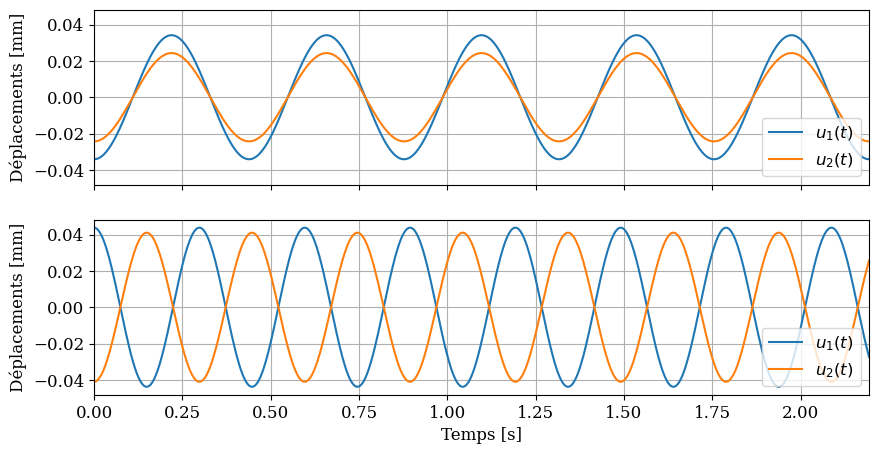

In [17]:
def uModeA(t:float):
    return Ua[:,np.newaxis] * np.cos(wa*t)
def uModeB(t:float):
    return Ub[:,np.newaxis] * np.cos(wb*t)

tf = 5 * 2*np.pi/wa
allt = np.linspace(0,tf,1000)
alluA = Pc2u @ uModeA(allt)
alluB = Pc2u @ uModeB(allt)


fig,axs = plt.subplots(2,1,sharex=True,sharey=True,figsize=(10,5))
axs[0].plot(allt,alluA[0],label="$u_1(t)$")
axs[0].plot(allt,alluA[1],label="$u_2(t)$")
axs[1].plot(allt,alluB[0],label="$u_1(t)$")
axs[1].plot(allt,alluB[1],label="$u_2(t)$")
axs[0].legend(loc="lower right")
axs[0].grid(visible=True)
axs[0].set_ylabel("Déplacements [mm]")
axs[1].legend(loc="lower right")
axs[1].grid(visible=True)
axs[1].set_xlabel("Temps [s]")
axs[1].set_ylabel("Déplacements [mm]")
axs[1].set_xlim(0,tf)

plt.show()


Le mode de vibration 1 peut être assimilé à un mode de translation vertical alors que le mode de vibration 2 peut être assimilé à un mode de rotation autour d'un axe passant par le centre de masse du véhicule :

![Allure des modes de vibrations](pictures/TD3-ModesVibrations.png)

## Oscillations libres

### Conditions initiales

Nous souhaitons étudier la réponse en oscillation libre lors des déplacements initiaux  $u_1(t=0) = u_2(t=0) = 10\,\mathrm{cm}$ sont imposés, et des vitesses initiales nulles. En d'autres termes, nous cherchons à résoudre le système d'équations :
$$
\begin{split}
&\begin{bmatrix}
    \mathbf{M}
\end{bmatrix}
\begin{pmatrix}
    \ddot{u}_C(t) \\ \ddot{\theta}_C(t)
\end{pmatrix}
+
\begin{bmatrix}
    \mathbf{K}
\end{bmatrix}
\begin{pmatrix}
    {u}_C(t) \\ {\theta}_C(t)
\end{pmatrix}
=
\begin{pmatrix}
    0 \\ 0
\end{pmatrix},
\forall{t}, 
\\
&\begin{pmatrix}
    {u}_1(t=0) \\ u_{2}(t=0)
\end{pmatrix}
=
\begin{pmatrix}
    0.1 \\ 0.1
\end{pmatrix},
\quad
\begin{pmatrix}
    \dot{u}_1(t=0) \\ \dot{u}_{2}(t=0)
\end{pmatrix}
=
\begin{pmatrix}
    0 \\ 0
\end{pmatrix}.
\end{split}
$$
Les conditions initiales sont données à partir des déplacements aux extrémités. Nous avons des équations du mouvement faisant intervenir les DDL associés au centre de masse. Il est donc nécessaire de retranscrire les conditions initiales à partir de ces DDL :
$$
\begin{split}
\begin{pmatrix}
    {u}_C(t=0) \\ \theta_{C}(t=0)
\end{pmatrix}
&=
\begin{bmatrix}
    l_2/l & l_1/l \\
    1/l & -1/l
\end{bmatrix}
\begin{pmatrix}
    u_1(t=0) \\ u_2(t=0)
\end{pmatrix}
=
\begin{pmatrix}
    0.1 \\ 0
\end{pmatrix},
\\
\begin{pmatrix}
    \dot{u}_C(t=0) \\ \dot{\theta}_{C}(t=0)
\end{pmatrix}
&=
\begin{bmatrix}
    l_2/l & l_1/l \\
    1/l & -1/l
\end{bmatrix}
\begin{pmatrix}
    \dot{u}_1(t=0) \\ \dot{u}_2(t=0)
\end{pmatrix}
=
\begin{pmatrix}
    0 \\ 0
\end{pmatrix}.
\end{split}
$$

### Décomposition modale

Nous avons identifié les modes de vibrations. Nous allons les utiliser pour résoudre le problème d'oscillation libre. La solution est une combinaison des modes de vibrations :
$$
\begin{pmatrix}
    {u}_C(t) \\ 
    {\theta}_{C}(t)
\end{pmatrix}
=
\mathbf{v}_a \alpha_a(t) + \mathbf{v}_b \alpha_b(t),
$$
où les amplitudes modales $\alpha_a(t)$ et $\alpha_b(t)$ sont solutions de problème à 1 DDL :
$$
\left\{
\begin{array}{l}
    m_a \ddot{\alpha}_a(t) + k_a {\alpha}_a(t) = 0, \forall{}t,\\
    \alpha_a(t=0) = \alpha_{a}^{0},\\
    \dot{\alpha}_a(t=0) = \dot{\alpha}_{a}^{0}.
\end{array}
\right.
\qquad
\left\{
\begin{array}{l}
    m_b \ddot{\alpha}_b(t) + k_b {\alpha}_b(t) = 0, \forall{}t,\\
    \alpha_b(t=0) = \alpha_{b}^{0},\\
    \dot{\alpha}_b(t=0) = \dot{\alpha}_{b}^{0}.
\end{array}
\right.
$$
Les conditions initiales pour ces sous-problèmes $\alpha_{a}^{0}, \dot{\alpha}_{a}^{0}, \alpha_{b}^{0}, \dot{\alpha}_{b}^{0}$ peuvent être obtenues en utilisant les propriétés d'orthogonalité des modes de vibrations, de la manière suivante :
$$
\begin{split}
&\begin{pmatrix}
    {u}_C(t=0) \\ 
    {\theta}_{C}(t=0)
\end{pmatrix}
=
\mathbf{v}_a \alpha_a(t=0) + \mathbf{v}_b \alpha_b(t=0)
\\
&\mathbf{M}
\begin{pmatrix}
    {u}_C(t=0) \\ 
    {\theta}_{C}(t=0)
\end{pmatrix}
=
\mathbf{M}
\mathbf{v}_a \alpha_a(t=0) 
+ 
\mathbf{M}
\mathbf{v}_b \alpha_b(t=0)
\\
&\mathbf{v}_a^{\top}
\mathbf{M}
\begin{pmatrix}
    {u}_C(t=0) \\ 
    {\theta}_{C}(t=0)
\end{pmatrix}
=
\mathbf{v}_a^{\top}
\mathbf{M}
\mathbf{v}_a \alpha_a(t=0) 
+ 
\underbrace{
\mathbf{v}_a^{\top}
\mathbf{M}
\mathbf{v}_b}_{=0} \alpha_b(t=0)
\\
\Rightarrow\quad&
\boxed{
\alpha_a(t=0) = \frac{1}{\mathbf{v}_a^{\top}
\mathbf{M}
\mathbf{v}_a}
\mathbf{v}_a^{\top}\mathbf{M}
\begin{pmatrix}
    {u}_C(t=0) \\ 
    {\theta}_{C}(t=0)
\end{pmatrix}.
}
\end{split}
$$
sachant que généralement $\mathbf{v}_a^{\top}\mathbf{M}\mathbf{v}_a = 1$ (masse modale unitaire). Dans ce cas, nous obtenons :
$$
\begin{split}
\alpha_{a}^0
= 
\mathbf{v}_a^{\top}\mathbf{M}
\begin{pmatrix}
    0.1 \\ 0
\end{pmatrix}
=
\mathbf{v}_a^{\top}
\begin{pmatrix}
    0.1 m \\ 0
\end{pmatrix},
\quad&
\dot{\alpha}_a^0
= 
\mathbf{v}_a^{\top}\mathbf{M}
\begin{pmatrix}
    0 \\ 0
\end{pmatrix} = 0,
\\
\alpha_{b}^0
= 
\mathbf{v}_b^{\top}\mathbf{M}
\begin{pmatrix}
    0.1 \\ 0
\end{pmatrix}
=
\mathbf{v}_b^{\top}
\begin{pmatrix}
    0.1 m \\ 0
\end{pmatrix},
\quad&
\dot{\alpha}_b^0
= 
\mathbf{v}_b^{\top}\mathbf{M}
\begin{pmatrix}
    0 \\ 0
\end{pmatrix} = 0.
\end{split}
$$

La résolution des sous-problèmes à 1 DDL est directe (voir CM1) :
$$
\begin{split}
&\boxed{
    \alpha_a(t) = \alpha_{a}^0\cos(\omega_a t) + \frac{\dot{\alpha}_{a}^0}{\omega_a}\sin(\omega_a t), \forall{t}.
}
\\
&\boxed{
    \alpha_b(t) = \alpha_{b}^0\cos(\omega_b t) + \frac{\dot{\alpha}_{b}^0}{\omega_b}\sin(\omega_b t), \forall{t}.
}
\end{split}
$$
Une fois ces amplitudes modales obtenues, la solution globale décrivant l'oscillation libre du véhicule en découle :
$$
\begin{pmatrix}
    {u}_C(t) \\ 
    {\theta}_{C}(t)
\end{pmatrix}
=
\mathbf{v}_a \alpha_a(t) + \mathbf{v}_b \alpha_b(t),
$$
ou encore :
$$
\begin{pmatrix}
    {u}_1(t) \\ 
    {u}_2(t)
\end{pmatrix}
=
\begin{bmatrix}
    1 & l_1 \\
    1 & -l_2
\end{bmatrix}
\begin{pmatrix}
    {u}_a \\ 
    {\theta}_a
\end{pmatrix}\alpha_a(t) 
+ 
\begin{bmatrix}
    1 & l_1 \\
    1 & -l_2
\end{bmatrix}
\begin{pmatrix}
    {u}_b \\ 
    {\theta}_b
\end{pmatrix}\alpha_b(t).
$$

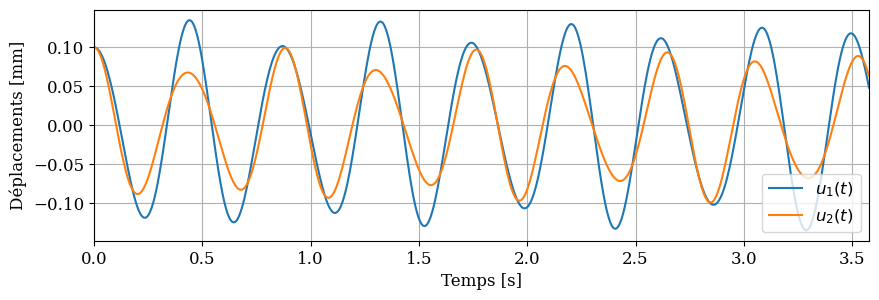

In [18]:
u0 = np.array([0.1, 0.1])
v0 = np.array([0.0, 0.0])

alphaA0  = Ua.T @ Mc @ Pu2c @ u0
dalphaA0 = Ua.T @ Mc @ Pu2c @ v0
alphaB0  = Ub.T @ Mc @ Pu2c @ u0
dalphaB0 = Ub.T @ Mc @ Pu2c @ v0

def alphaA(t:float):
    return alphaA0 * np.cos(wa*t) + dalphaA0/wa * np.sin(wa*t)
def alphaB(t:float):
    return alphaB0 * np.cos(wb*t) + dalphaB0/wb * np.sin(wb*t)

def u(t:float):
    return Ua[:,np.newaxis] * alphaA(t) + Ub[:,np.newaxis] * alphaB(t)

tf = 12 * 2*np.pi/wb
allt = np.linspace(0,tf,1000)
allu = Pc2u @ u(allt)


fig,ax = plt.subplots(figsize=(10,3))
ax.plot(allt,allu[0],label="$u_1(t)$", )
ax.plot(allt,allu[1],label="$u_2(t)$")
ax.legend(loc="lower right")
ax.grid(visible=True)
ax.set_xlabel("Temps [s]")
ax.set_ylabel("Déplacements [mm]")
ax.set_xlim(0,tf)

plt.show()
